**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

**Number to text conversion**

In [6]:
dictionary = dict()
review = ''

for (key, value) in imdb.get_word_index().items():
    dictionary[value] = key

decoded_review = " ".join([dictionary.get(i - 3, ".") for i in train_data[0]])
decoded_review

". this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert . is an amazing actor and now the same being director . father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for . and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also . to the two little boy's that played the . of norman and paul they were just brilliant children are often left out of the . list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
def vectorize(data, dimension=10000):
    
    results = np.zeros((len(data), dimension))
    
    for i, sequence in enumerate(data):
        
        for j in sequence:
            
            results[i, j] = 1.
    
    return results

In [8]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Train Validation Data Split**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Building your model

**Model definition**

In [12]:
model = Sequential([
        Dense(16, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid")
])

**Compiling the model**

In [13]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

**Training your model**

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 25ms/step - loss: 0.4968 - accuracy: 0.7946 - val_loss: 0.3745 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2872 - accuracy: 0.9079 - val_loss: 0.3107 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2152 - accuracy: 0.9297 - val_loss: 0.2809 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1681 - accuracy: 0.9469 - val_loss: 0.2897 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1385 - accuracy: 0.9589 - val_loss: 0.2840 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1137 - accuracy: 0.9649 - val_loss: 0.2988 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0921 - accuracy: 0.9736 - val_loss: 0.3236 - val_accuracy: 0.8815
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

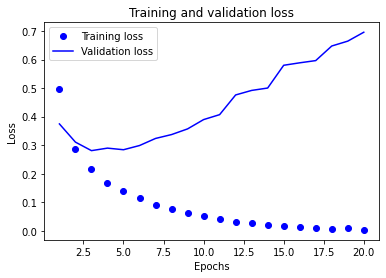

In [16]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

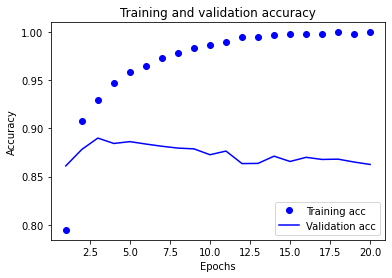

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [18]:
model = Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [19]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4604 - accuracy: 0.8125
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2589 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2004 - accuracy: 0.9274
Epoch 4/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1685 - accuracy: 0.9389


In [20]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2948 - accuracy: 0.8828


In [21]:
results

[0.2947801649570465, 0.8828399777412415]